<a href="https://colab.research.google.com/github/Saadkhan55/Arm-Intern-Challenge/blob/master/tSNEplots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving scRNA-seq data.xlsx to scRNA-seq data.xlsx
Saving t-SNE coordinates and sigmas.xlsx to t-SNE coordinates and sigmas.xlsx


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
df = pd.read_excel('scRNA-seq data.xlsx')
print(df.sample(n=5, random_state=1))
dfTransf = pd.read_excel('t-SNE coordinates and sigmas.xlsx')
print(dfTransf.sample(n=5, random_state=1))

            GACATAATGTTA  GCCCAGTCCAAG  GATGGAACCGCG  GCTAACCGGATG  \
AF131215.9             0             0             0             0   
MYO15B                 0             1             0             1   
SOX13                  0             0             0             0   
TIA1                   6             1             0             3   
UFSP2                  3             1             5             2   

            TCCTTACGGACT  ACGGGCCAGGCA  AGTCCTTTTTCT  TGGCCCGGCCCT  \
AF131215.9             0             1             0             0   
MYO15B                 2             0             2             1   
SOX13                  0             0             0             0   
TIA1                   1             0             2             4   
UFSP2                  0             2             1             2   

            CGTCTTCCTACC  CCCGCATTGGAC      ...       CGGAGTACCGGG  \
AF131215.9             0             0      ...                  0   
MYO15B            

In [0]:
# Defining scores and distances

# Useful bits that are reused a lot
norm = lambda x,y : np.linalg.norm((np.array(x)-np.array(y)), None)
step1 = lambda i, j: np.power(1+norm(df.iloc[i,], df.iloc[j,]), -1)
var = lambda x: pd.DataFrame.var(x)
getCells =  lambda i, df: df[df.columns[i]]
step1P = lambda i, j, df: np.exp((-1*(norm(getCells(i, df), getCells(j, df))))/(2*var(getCells(i,df))))

def dQ(i, j, df):
    num = step1(i,j)
    denom = 0
    for k in range(df.shape[0]):
      for l in range(df.shape[0]):
        if k != l:
          denom += step1(k,l)
    return (num/denom)
  
def dp(i, j, df):
  num = step1P(i,j,df)
  denom = 0
#   print(norm(getCells(i, df), getCells(j, df))**2)
#   print((2*var(getCells(i,df))))
  for k in range(df.shape[1]):
    if k != i:
      denom += step1P(i,k,df)
  return (num/denom)

def dP(i, j, df):
  num = dp(i,j,df) + dp(j,i,df)
  denom = 2*df.shape[1]
  return (num/denom)

def totalScore(i, j, df, df2):
  return (dP(i,j,df)*np.log((dP(i,j,df)/(dQ(i,j,df2)))))

In [0]:
df2 = dfTransf.drop(['sigma'], axis=1)

scores = np.zeros(df2.shape[0])
for x in range(len(scores)):
  for y in range(len(scores)):
    if x!=y:
      scores[x]+= totalScore(x,y,df,df2)

(12101, 500)
(500, 3)


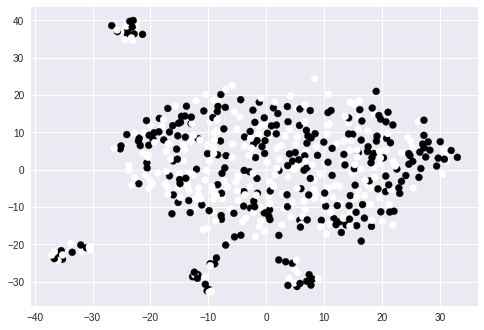

In [138]:
print(df.shape)
print(dfTransf.shape)

# Plot the tsne coordinates, and for the scoring matrix we shall consider exactly the kullback leibler distance as used in the objective function for tSNE, as this is exactly what we are trying to improve, so the lowest scores here denote particularly well placed cells, which are represented by a lighter overall colour
# For each element i, we take the sum over every other element of the pairwise score
plt.scatter(dfTransf['t-SNE Coordinate 1'], dfTransf['t-SNE Coordinate 2'], c=scores)